# Part c - Bias-variance trade-off
Our goal in this notebook is to make a plot similar to Fig. 2.11 in "The Elements of Statistical Learning", by Hastie, Tibishirani and Friedman.

In [48]:
import numpy as np
import os
os.sys.path.append(os.path.dirname(os.path.abspath('.')))
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

# Import local modules
from src.models.models import OLS
from src.evaluation.evaluation import mse
from sklearn.model_selection import train_test_split

In order not to make things too complicated, we will concentrate on just one set of target values here.

In [56]:
df_X = pd.read_csv('../data/generated/X.csv', index_col=0)
df_z_some_noise = pd.read_csv('../data/generated/noisy.csv', usecols=[1])
z = np.array(df_z_some_noise).ravel()
all_columns = list(df_X.columns)

We now will obtain train and test MSE for different polynomial degree (from 0 to 5).

In [58]:
os = OLS()
columns_by_degree = [
    all_columns[0],
    all_columns[0:3],
    all_columns[0:6],
    all_columns[0:10],
    all_columns[0:15],
    all_columns
]
train_mse_scores = np.zeros(len(columns_by_degree))
test_mse_scores = np.zeros(len(columns_by_degree))

z_train, z_test = train_test_split(z, test_size=0.7, random_state=32)
# Obtain train mse for degree=zero
train_predictions = np.repeat(np.mean(z_train), z_train.shape[0])
test_predictions = np.repeat(np.mean(z_train), z_test.shape[0])
train_mse_scores[0] = mse(z_train, train_predictions)
test_mse_scores[0] = mse(z_test, test_predictions)

for degree in range(1, len(columns_by_degree)):
    cols = columns_by_degree[degree]
    X = np.array(df_X[cols])
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.7, random_state=32)
    
    os.fit(X_train, z_train)
    # Obtain train mse
    predictions = os.predict(X_train)
    mse_score = mse(z_train, predictions)
    train_mse_scores[degree] = mse_score
    
    # Obtain test mse
    predictions = os.predict(X_test)
    mse_score = mse(z_test, predictions)
    test_mse_scores[degree] = mse_score
    


The above code will allow us to make the following plot

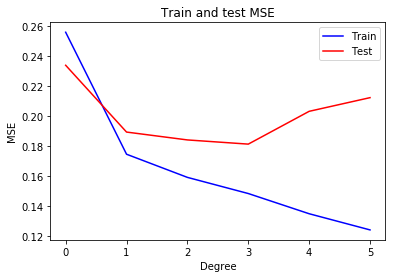

In [67]:
plt.figure()
plt.title('Train and test MSE')
plt.plot(train_mse_scores, c='b', label='Train')
plt.plot(test_mse_scores, c='r', label='Test')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.legend()
plt.savefig('../reports/figures/3_train_and_test_mse.png')
plt.show()
